In [462]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import stats for performing statistical tests
import scipy.stats as stats

# import nltk
import nltk

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords

# import regular expression
import re

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score


# import statsmodels
import statsmodels.api as sma

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

#import langid for detecting language
import langid

#importing wordLemmatizer 
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity


In [392]:
df_bks=pd.read_csv('books_1.Best_Books_Ever.csv')
df_bks.head()

title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language         isbn  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English  9.78044E+12   
1  There is a door at the end of a silent corrido...  English  9.78044E+12   
2  The unforgettable novel of a childhood in a sl...  English        1E+13   
3  Alternate cover edition of ISBN 9780679783268S...  English        1E+13   
4  About three things I was absolutely positive.\...  English  9.78032E+12   

                                              genres  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   

                                          characters bookFormat  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  Hardcover   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  Paperback   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  Paperback   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...  Paperback   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...  Paperback   

                              edition pages                         publisher  \
0                       First Edition   374                  Scholastic Press   
1                          US Edition   870                   Scholastic Inc.   
2                                 NaN   324  Harper Perennial Modern Classics   
3  Modern Library Classics, USA / CAN   279                    Modern Library   
4                                 NaN   501         Little, Brown and Company   

  publishDate firstPublishDate  \
0    09/14/08              NaN   
1    09/28/04         06/21/03   
2    05/23/06       07-11-1960   
3  10-10-2000         01/28/13   
4  09-06-2006       10-05-2005   

                                              awards  numRatings  \
0  ['Locus Award Nominee for Best Young Adult Boo...     6376780   
1  ['Bram Stoker Award for Works for Young Reader...     2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...     4501075   
3                                                 []     2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...     4964519   

                                      ratingsByStars  likedPercent  \
0  ['3444695', '1921313', '745221', '171994', '93...          96.0   
1  ['1593642', '637516', '222366', '39573', '14526']          98.0   
2  ['2363896', '1333153', '573280', '149952', '80...          95.0   
3  ['1617567', '816659', '373311', '113934', '767...          94.0   
4  ['1751460', '1113682', '1008686', '542017', '5...          78.0   

                                             setting  bbeScore  bbeVotes price  
0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   2993816     30516  5.09  
1  ['Hogwarts School of Witchcraft and Wizardry (...   2632233     26923  7.38  
2               ['Maycomb, Alabama (United States)']   2269402     23328   NaN  
3  ['United Kingdom', 'Derbyshire, England (Unite...   1983116     20452   NaN  
4  ['Forks, Washington (United States)', 'Phoenix...   1459448     14874   2.1

The dataset has initially 52478 rows and 23 columns

In [393]:
df_bks.shape

(52478, 23)

In [394]:
df_bks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             52478 non-null  object 
 1   series            23470 non-null  object 
 2   author            52478 non-null  object 
 3   rating            52478 non-null  float64
 4   description       51140 non-null  object 
 5   language          48672 non-null  object 
 6   isbn              52478 non-null  object 
 7   genres            52478 non-null  object 
 8   characters        52478 non-null  object 
 9   bookFormat        51005 non-null  object 
 10  edition           4955 non-null   object 
 11  pages             50131 non-null  object 
 12  publisher         48782 non-null  object 
 13  publishDate       51598 non-null  object 
 14  firstPublishDate  31152 non-null  object 
 15  awards            52478 non-null  object 
 16  numRatings        52478 non-null  int64 

### Problem Statement:
###          This is an attempt to figure out if books can be judged by the blurb or cover. I wanted to find out if the description of a book is indicative of the genre or the rating of the book. Or if the genre of a book can be figured out by looking at the cover.

Only the columns 'Description', 'Genres' and 'Rating' are essential for our calculation purpose. 

case 1: To find out if there is any relationship between the genre and rating.

case 2: To find out if there is any relationship between the description and Genre.


### case -1 To find out if there is any relationship between the genre and rating.

In [395]:
df_bks=df_bks[['description','genres','rating']]

Checking for the number of null values 

In [396]:
df_bks.isnull().sum()

description    1338
genres            0
rating            0
dtype: int64

Dropping the null values

In [397]:
df_bks.dropna(inplace=True)

The modified shape after dropping 

In [398]:
df_bks.shape

(51140, 3)

In [399]:
df_bks.isnull().sum()

description    0
genres         0
rating         0
dtype: int64

On describing the columns, I noted that there are descriptions that are in other languages and genres which are [] empty

In [400]:
df_bks.describe(include=object)

description genres
count                                               51140  51140
unique                                              50884  43658
top     هذه هي طبعة "دار الفكر - بيروت" وهي آخر طبعة ع...     []
freq                                                   37   4053

Getting the values where the genres are empty [] and removing it from the dataset

In [401]:
 df_bks=df_bks[~(df_bks['genres']=='[]')] 

From the inference we found that there are lot of genres which are in 'Fiction'

In [402]:
df_bks.describe(include=object)

description       genres
count                                               47087        47087
unique                                              46862        43657
top     هذه هي طبعة "دار الفكر - بيروت" وهي آخر طبعة ع...  ['Fiction']
freq                                                   37          202

Inorder to remove the other languages description from the dataset. Gave value counts to know the overall dataset

In [403]:
df_bks['description'].value_counts()

هذه هي طبعة "دار الفكر - بيروت" وهي آخر طبعة عربية تم اصدارها حتي الآن على 47 جزء في 23 مجلد بالاضافة الى مجلد خاص بالفهارس كتبه الاستاذ محمد عبد الرحيم بمقدمة خاصة وسرد سيرة الفيلسوف "ويل ديورانت" مؤلف الموسوعة الاشهر في القرن العشرينكتاب موسوعي تاريخي ضخم من تأليف الفيلسوف والمؤرخ الأمريكي "ويل ديورانت" وزوجته "أريل ديورانت". هي موسوعة في فلسفة التاريخ قضى مؤلفها عشرات السنين في إعدادها، فقرأ لذلك عشرات المؤلفات وطاف بجميع أرجاء العالم من شرقية إلى غربية أكثر من مرة على مدار 40 عامًا من عام 1935 حتى عام 1975، وحسب القارئ دليلا على الجهد الذي بذله في إعداد العدة لها أن يطلع على ثبت المراجع العامة والخاصة الذي أثبتناه في آخر كل جزء من هذه الأجزاء. وقد كان يعتزم في بادئ الأمر أن تكون هذه السلسلة في خمسة مجلدات، ولكن البحث تشعب والمادة كثرت فزادها إلى سبعة، ثم تجاوزت هذا العدد الذي قدره لها أخيراً فقررها في 11 مجلد. يتحدث فيها عن قصة جميع الحضارات البشرية منذ بدايتها وحتى عصر نابليون ويتسم بالموضوعية وبالمنهج العلميوالخلاصة أن هذه السلسلة ذخيرة علمية لا غنى عنها للمكتبة العربية ولعشاق ال

Installed langid library to detect the language in the code

In [404]:
# pip install langid

Finding out the language for all the descriptions 

In [405]:

target_language = 'en' 

def detect_language(text):
    lang, confidence = langid.classify(text)
    return lang, confidence

df_bks['language'], df_bks['confidence'] = zip(*df_bks['description'].map(detect_language))

filtered_data = df_bks[df_bks['language'] == target_language]

print(filtered_data)


                                             description  \
0      WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1      There is a door at the end of a silent corrido...   
2      The unforgettable novel of a childhood in a sl...   
3      Alternate cover edition of ISBN 9780679783268S...   
4      About three things I was absolutely positive.\...   
...                                                  ...   
52473  The Fateful Trilogy continues with Fractured. ...   
52474  'Anasazi', sequel to 'The Thirteenth Chime' by...   
52475  --READERS FAVORITE AWARDS WINNER 2011--Sixteen...   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...   
52477  Fighting in Helaman's army is Keturah's deepes...   

                                                  genres  rating language  \
0      ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...    4.33       en   
1      ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...    4.50       en   
2      ['Classics', 'Fiction', 'Historical Ficti

Retaining only the data which has 'English' description

In [406]:
df_bksN=pd.DataFrame(filtered_data)

Viewing the data which is in other languages`

In [407]:
df_bks[df_bks['language']!='en']

description  \
309    Mystical storyThe internal revolution of a wom...   
369    كتاب "انتحار فاشل" عبارة عن مجموعة قصصية متنوع...   
378    كان الجميع يعلم أنه عصبى .. هذه ليست المشكلة، ...   
425    Wielki uczony - wciąż spragniony wiedzy o sens...   
494    Wie alle Hauptwerke Hermann Hesses hat auch de...   
...                                                  ...   
52403  Recopilación de las tiras de Edén publicadas d...   
52418  "იყო და არა იყო რა, ერთი დიდი, ძალიან დიდი ოჯა...   
52427  Ces poèmes qui forment le Requiem et dont on l...   
52440  Modlitwa o deszcz jest owocem jedenastu podróż...   
52462  An alternate cover for this isbn can be found ...   

                                                  genres  rating language  \
309                                          ['Fiction']    3.92       fa   
369    ['Short Stories', 'Fiction', 'Anthologies', 'N...    4.51       ar   
378          ['Short Stories', 'Fiction', 'Anthologies']    4.52       ar   
425    ['Classics', 'Fiction', 'Plays', 'Poetry', 'Ge...    3.93       pl   
494    ['Fiction', 'Classics', 'Philosophy', 'Literat...    4.13       de   
...                                                  ...     ...      ...   
52403  ['Comics', 'Graphic Novels', 'Graphic Novels C...    3.97       es   
52418  ['Childrens', 'Fiction', 'Classics', 'Scandina...    4.38       ka   
52427  ['Poetry', 'Russia', 'Russian Literature', 'Cl...    4.32       fr   
52440  ['Nonfiction', 'Polish Literature', 'History',...    4.33       pl   
52462  ['Short Stories', 'Fiction', 'France', 'Litera...    3.56       fa   

        confidence  
309   -3512.475114  
369   -3423.522111  
378   -5064.954088  
425   -1478.836419  
494   -5145.779381  
...            ...  
52403  -388.970853  
52418 -1675.781498  
52427 -1886.035204  
52440 -3526.275169  
52462 -1383.055143  

[4883 rows x 5 columns]

Now the description seems to be okay and relatable

In [408]:
df_bksN.describe(include=object)

description       genres  \
count                                               42204        42204   
unique                                              42069        39568   
top     This book was converted from its physical edit...  ['Fiction']   
freq                                                   14          153   

       language  
count     42204  
unique        1  
top          en  
freq      42204

In [409]:
df_bksN['description'].value_counts()

This book was converted from its physical edition to the digital format by a community of volunteers. You may find it for free on the web. Purchase of the Kindle edition includes wireless delivery.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Removing the Stop words that are not needed for our analysis. This will unwantedly increase the columns of the vectors

In [410]:
stop_words=list(set(stopwords.words('english') +list(STOPWORDS)))

In [411]:
stop_words

['his',
 "hasn't",
 'more',
 "we've",
 'from',
 'hence',
 'a',
 'also',
 'being',
 'should',
 'yours',
 'else',
 "she'll",
 'we',
 "they've",
 'not',
 'my',
 'here',
 'me',
 "i'll",
 "they're",
 'mustn',
 "he'd",
 "haven't",
 'be',
 'just',
 'shall',
 'i',
 'your',
 "shan't",
 'so',
 "when's",
 'ourselves',
 "can't",
 'ours',
 'http',
 "didn't",
 'above',
 'where',
 'is',
 "you've",
 'under',
 "there's",
 'itself',
 "we'd",
 "hadn't",
 'get',
 "here's",
 'whom',
 'below',
 'theirs',
 'through',
 'as',
 'himself',
 'o',
 'hadn',
 'would',
 'him',
 'while',
 "that's",
 'until',
 "it's",
 'nor',
 'between',
 'on',
 'these',
 'com',
 'do',
 'r',
 'down',
 "she'd",
 "you're",
 'weren',
 'that',
 'she',
 'needn',
 'very',
 'about',
 'at',
 'aren',
 'too',
 'isn',
 'mightn',
 "won't",
 'k',
 "doesn't",
 'what',
 "mustn't",
 "who's",
 'won',
 'out',
 'are',
 'when',
 'don',
 'once',
 'wasn',
 'no',
 "should've",
 'off',
 "aren't",
 "what's",
 "he's",
 'now',
 "needn't",
 "they'll",
 've',
 'th

Removing the numbers and other symbols in the dataset and retaining only the alphabets

In [412]:

df_bksN['description']=df_bksN['description'].apply(lambda x : re.sub('[^a-zA-Z]+', ' ', ''.join(x).lower()))

In [413]:


wnl = WordNetLemmatizer()

df_bksN['description'] = df_bksN['description'].apply(lambda x : ' '.join([ wnl.lemmatize(i)  for i in x.split()]))

In [414]:
df_bksN['description']=df_bksN['description'].apply(lambda x : ' '.join([ i for i in x.split() if i not in stop_words]))

### Lemmatization

 Lemmatization is a data preprocessing technique. This technique reduces words to their base or dictionary form

In [415]:
df_bksN['genres'] = df_bksN['genres'].apply(lambda x : re.sub('[^a-zA-Z]+', ' ', ''.join(x).lower()))
wnl = WordNetLemmatizer()

df_bksN['genres'] = df_bksN['genres'].apply(lambda x : ' '.join([ wnl.lemmatize(i)  for i in x.split()]))
df_bksN['genres']=df_bksN['genres'].apply(lambda x : ' '.join([ i for i in x.split() if i not in stop_words]))

Removing the stopwords from the dataset

In [416]:
df_bksN

description  \
0      winning mean fame fortune losing mean certain ...   
1      door end silent corridor haunting harry pottte...   
2      unforgettable novel childhood sleepy southern ...   
3      alternate cover edition isbn immediate success...   
4      three thing wa absolutely positive first edwar...   
...                                                  ...   
52473  fateful trilogy continues fractured called fra...   
52474  anasazi sequel thirteenth chime emma michael o...   
52475  reader favorite award winner sixteen year old ...   
52476  powerful tremor unearths ancient secretburied ...   
52477  fighting helaman army keturah deepest desire c...   

                                                  genres  rating language  \
0      young adult fiction dystopia fantasy science f...    4.33       en   
1      fantasy young adult fiction magic childrens ad...    4.50       en   
2      classic fiction historical fiction school lite...    4.28       en   
3      classic fiction romance historical fiction lit...    4.26       en   
4      young adult fantasy romance vampire fiction pa...    3.60       en   
...                                                  ...     ...      ...   
52473  vampire paranormal young adult romance fantasy...    4.00       en   
52474                                mystery young adult    4.19       en   
52475  fantasy young adult paranormal angel romance d...    3.70       en   
52476  fiction mystery historical fiction adventure c...    3.85       en   
52477  lds fiction historical fiction young adult fic...    4.02       en   

        confidence  
0     -1747.504959  
1     -1935.690954  
2     -1697.282668  
3     -1434.488819  
4      -832.165873  
...            ...  
52473 -1772.979251  
52474 -1066.951253  
52475 -1257.538388  
52476 -1772.502324  
52477  -837.752211  

[42204 rows x 5 columns]

###  Creating a Base Model to check if there is any relationship between the Genres and the Rating

In [417]:
common_words = pd.Series(' '.join(df_bksN['genres']).split()).value_counts()[:50]
common_words

fiction         55765
adult           26341
romance         25832
fantasy         24762
historical      14609
contemporary    13922
young           13467
mystery         11078
science         10327
literature      10279
paranormal       8896
novel            8663
thriller         7594
nonfiction       7328
audiobook        6902
classic          6230
adventure        6111
history          5094
childrens        4891
biography        4396
christian        4180
suspense         4156
magic            4117
humor            3879
crime            3741
memoir           3678
comic            3551
urban            3523
grade            3398
middle           3302
american         3263
lit              3194
chick            3177
supernatural     3129
war              2938
book             2918
century          2835
new              2732
teen             2726
horror           2699
th               2682
school           2606
graphic          2526
story            2498
literary         2434
realistic 

Remove the words that are not required or meaningless

In [418]:
word_removal=['th','new']

In [419]:
df_bksN['genres'] = df_bksN['genres'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
df_bksN['genres'].head()

0    young adult fiction dystopia fantasy science f...
1    fantasy young adult fiction magic childrens ad...
2    classic fiction historical fiction school lite...
3    classic fiction romance historical fiction lit...
4    young adult fantasy romance vampire fiction pa...
Name: genres, dtype: object

Words that are not used frequently, only one time it is used

In [420]:
Not_frequent = pd.Series(' '.join(df_bksN['genres']).split()).value_counts()[-84:]
Not_frequent

algebra      1
series       1
original     1
togo         1
right        1
            ..
principe     1
web          1
woodwork     1
tome         1
ukrainian    1
Length: 84, dtype: int64

Remove these words

In [421]:

df_bksN['genres'] = df_bksN['genres'].apply(lambda x: " ".join(x for x in x.split() if x not in Not_frequent))
df_bksN['genres'].head()

0    young adult fiction dystopia fantasy science f...
1    fantasy young adult fiction magic childrens ad...
2    classic fiction historical fiction school lite...
3    classic fiction romance historical fiction lit...
4    young adult fantasy romance vampire fiction pa...
Name: genres, dtype: object

**Analysis on the higher and lower rating**

In [422]:
df_bksN['rating']=df_bksN['rating'].apply(lambda x: round(x,0))

<AxesSubplot:ylabel='rating'>

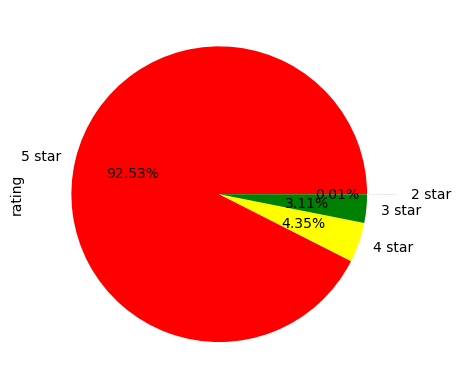

In [423]:
df_bksN['rating'].value_counts().plot(kind='pie', 
                                       autopct='%1.2f%%', 
                                       colors=["red","yellow","green","purple","blue"],explode=[0,0,0,0.2],
                                      labels=['5 star' ,'4 star','3 star','2 star','1 star'])

**Lets see what this words are in group 4 and 5 using word cloud**

### Positive Words

In [424]:

from wordcloud import WordCloud,STOPWORDS

positives=df_bksN[(df_bksN['rating']==4.0) |(df_bksN['rating']==5.0 )]
p_words = ' '.join(positives['genres'])
p_words

'young adult fiction dystopia fantasy science fiction romance adventure teen post apocalyptic action fantasy young adult fiction magic childrens adventure audiobook middle grade classic science fiction fantasy classic fiction historical fiction school literature young adult historical novel read school high school classic fiction romance historical fiction literature historical novel historical romance classic literature adult young adult fantasy romance vampire fiction paranormal paranormal romance supernatural teen urban fantasy historical fiction fiction young adult historical classic war holocaust world war ii book book audiobook classic fiction dystopia fantasy literature politics school science fiction novel read school fantasy classic fiction young adult childrens christian adventure science fiction fantasy middle grade christian fiction fantasy fiction classic adventure science fiction fantasy epic fantasy high fantasy young adult literature magic classic historical fiction fic

### **Neutral and Negative Sentiments**

In [425]:
neut_neg=df_bksN[(df_bksN['rating']==2) |(df_bksN['rating']==3)]
n_words = ' '.join(neut_neg['genres'])
n_words

'classic fiction historical fiction school literature high school read school historical classic literature american classic fiction literature africa historical fiction school novel read school adventure high school classic poetry fiction fantasy school mythology literature medieval read school epic classic fiction literature school historical fiction novel read school american classic literature high school classic fiction literature school romance historical fiction american novel high school classic literature fiction classic literature novel american contemporary thriller banned book century science fiction classic horror fiction gothic mystery literature century ghost audiobook paranormal classic fiction historical fiction war civil war literature historical school young adult american fiction contemporary mystery adult adult fiction drama unfinished british literature novel audiobook fiction horror fantasy zombie humor romance classic historical fiction paranormal historical fic

### Finding the common words in both the positive and negative words

In [426]:
def find_common_words(p_words, n_words):
 
    # Convert the strings to lowercase and split them into lists of words
    words1 = p_words.lower().split()
    words2 = n_words.lower().split()

    # Create sets from the lists of words
    set1 = set(words1)
    set2 = set(words2)

    # Find the intersection of the sets
    common_words = set1.intersection(set2)

    return common_words



In [427]:
common_words = find_common_words(p_words, n_words)
print(len(common_words))
print(common_words)

461
{'germany', 'russia', 'story', 'realistic', 'fiction', 'dinosaur', 'joke', 'greece', 'sweden', 'hungarian', 'german', 'lebanon', 'humor', 'america', 'read', 'personal', 'crime', 'memoir', 'chinese', 'neuroscience', 'medical', 'design', 'post', 'belgian', 'batman', 'lds', 'football', 'work', 'russian', 'revolutionary', 'fashion', 'futuristic', 'beauty', 'yaoi', 'erotica', 'reference', 'drink', 'monster', 'cookbook', 'chess', 'soccer', 'trivia', 'horse', 'comedy', 'spirituality', 'banking', 'architecture', 'audiobook', 'cultural', 'linguistics', 'bird', 'tv', 'hqn', 'film', 'graphic', 'egypt', 'u', 'esoterica', 'iran', 'western', 'illness', 'development', 'city', 'psychological', 'polyamory', 'indonesian', 'faith', 'star', 'author', 'romania', 'tale', 'zen', 'french', 'grad', 'india', 'teacher', 'computer', 'sport', 'christianity', 'holiday', 'romanov', 'baseball', 'nature', 'alien', 'asia', 'marvel', 'age', 'united', 'dutch', 'holocaust', 'foodie', 'gay', 'teaching', 'tragedy', 'rol

In [428]:
def remove_words_from_string(string, words_to_remove):
    words = string.lower().split()

    filtered_words = [word for word in words if word not in words_to_remove]
    
    filtered_string = ' '.join(filtered_words)
    print(filtered_words)
    return filtered_string


In [429]:
filtered_string = remove_words_from_string(p_words, common_words)
print(filtered_string)


['kid', 'kid', 'kid', 'buddhism', 'counting', 'kid', 'kid', 'kid', 'kid', 'kid', 'kid', 'kid', 'biblical', 'biblical', 'kid', 'portugal', 'portuguese', 'strip', 'kid', 'legal', 'physic', 'kid', 'taoism', 'eastern', 'legal', 'judaism', 'kid', 'kid', 'mountaineering', 'kid', 'ethiopia', 'justice', 'physic', 'astronomy', 'kid', 'astronomy', 'physic', 'native', 'botswana', 'disability', 'judaism', 'kid', 'productivity', 'justice', 'fighter', 'liberia', 'sierra', 'leone', 'outdoors', 'hinduism', 'legal', 'kid', 'legal', 'kid', 'kid', 'disability', 'kid', 'portugal', 'portuguese', 'legal', 'genetics', 'kid', 'emotion', 'hugo', 'award', 'sudan', 'kid', 'disability', 'buddhism', 'sierra', 'leone', 'buisness', 'fighter', 'hugo', 'award', 'non', 'kid', 'entrepreneurship', 'buddhism', 'craft', 'physic', 'spy', 'plantagenet', 'kid', 'skepticism', 'physic', 'judaism', 'non', 'disability', 'ecology', 'entrepreneurship', 'rabbit', 'kid', 'serbian', 'hugo', 'award', 'physic', 'strip', 'justice', 'pove

### Word cloud of the positive words

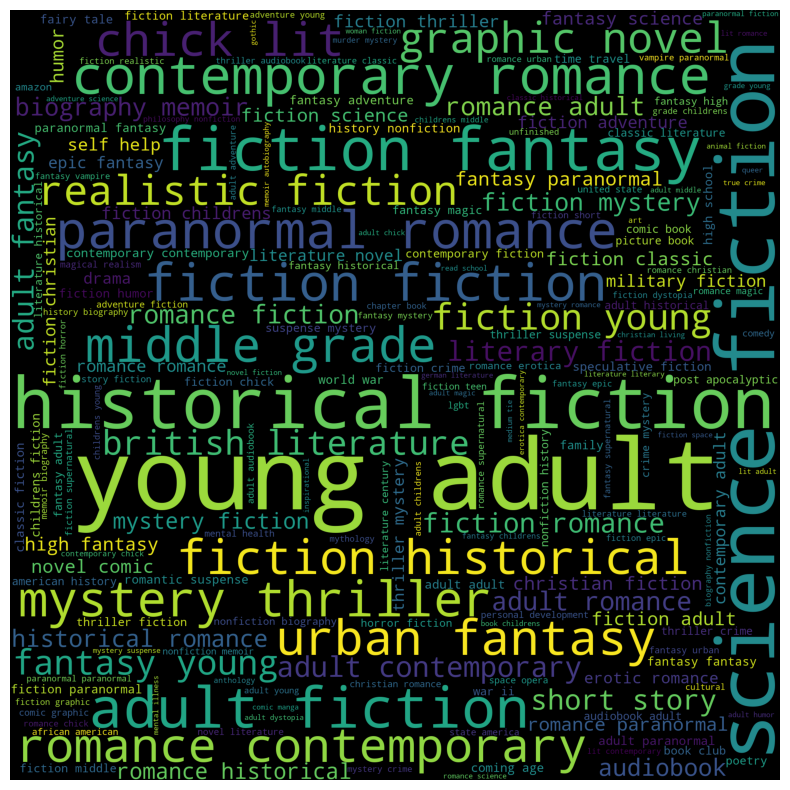

In [430]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(p_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word cloud of positive words without the frequent words

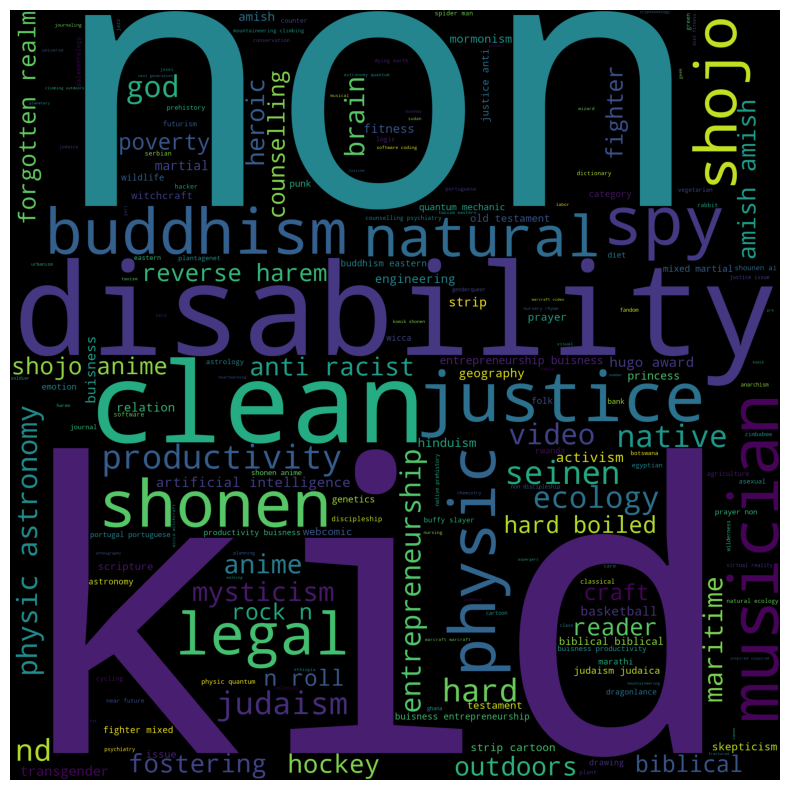

In [431]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(filtered_string)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the above two word clouds we infer that there are no similarities to both the word clouds once if we remove the common words.
This shows that there are words which highly influence the positive words are in the negative word clouds also.
So we cannot say that the rating is dependent on the genre of the book.
Genre does not influence the rating

**Neutral and Negative Sentiments**


In [432]:
len(p_words)

3742829

In [433]:
len(n_words)

150508

### Word cloud of negative words

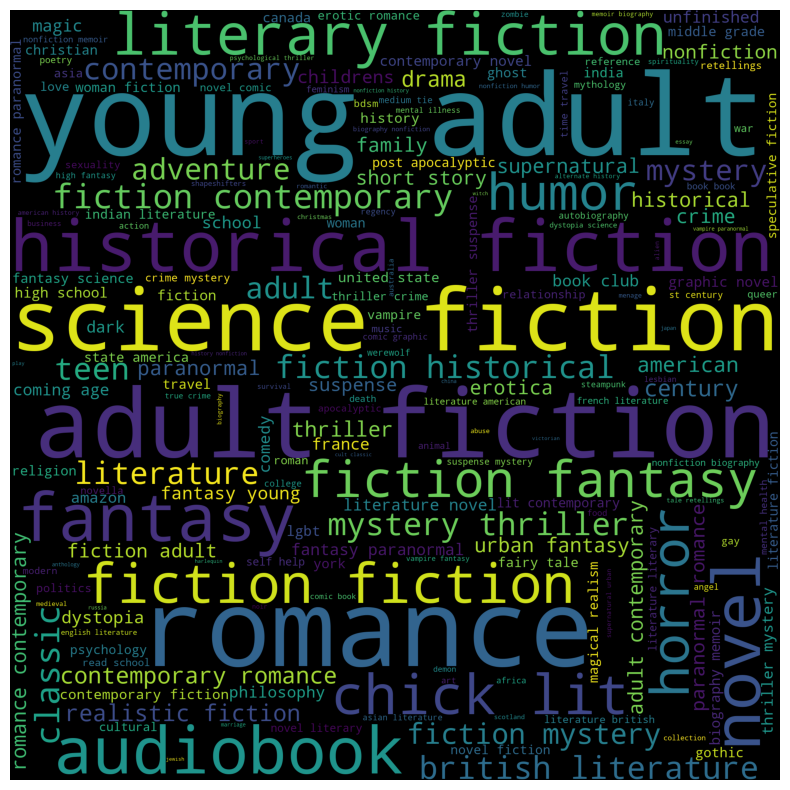

In [434]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(n_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [435]:
common_words

{'abuse',
 'academia',
 'academic',
 'action',
 'adoption',
 'adult',
 'adventure',
 'africa',
 'african',
 'age',
 'alchemy',
 'algeria',
 'alien',
 'alternate',
 'alternative',
 'amazon',
 'america',
 'american',
 'americana',
 'ancient',
 'angel',
 'animal',
 'anthology',
 'anthropology',
 'anthropomorphic',
 'apocalyptic',
 'archaeology',
 'architecture',
 'art',
 'arthurian',
 'asia',
 'asian',
 'atheism',
 'audiobook',
 'australia',
 'author',
 'autobiography',
 'aviation',
 'bande',
 'bangladesh',
 'banking',
 'banned',
 'baseball',
 'batman',
 'bdsm',
 'beast',
 'beauty',
 'beer',
 'belgian',
 'belgium',
 'biography',
 'biology',
 'bird',
 'bisexual',
 'bizarro',
 'boarding',
 'book',
 'boon',
 'boy',
 'brazil',
 'british',
 'business',
 'canada',
 'canadian',
 'cat',
 'catholic',
 'century',
 'change',
 'chapter',
 'chess',
 'chick',
 'childrens',
 'china',
 'chinese',
 'christian',
 'christianity',
 'christmas',
 'church',
 'cinderella',
 'city',
 'civil',
 'classic',
 'clima

In [436]:
len(n_words)

150508

All the words in the ratings which are low are there in the common words.

In [437]:
filtered_string_n = remove_words_from_string(n_words, common_words)
print(filtered_string_n)


[]




Doing Train-Test-Split on the data

In [438]:

X= df_bksN['genres']
y = df_bksN['rating']

xtrain , xtest , ytrain , ytest = train_test_split(X,y,test_size = 0.30,random_state = 24)


In [439]:
xtrain.shape

(29542,)

In [440]:
ytrain.shape

(29542,)

**Lets Create DTM (Document Term Matrix)**

In [441]:

vector = CountVectorizer(stop_words='english',min_df=5, max_df=0.85)
vector.fit(xtrain)

CountVectorizer(max_df=0.85, min_df=5, stop_words='english')

In [442]:
vector.get_feature_names_out()

array(['abuse', 'academia', 'academic', 'action', 'activism', 'adoption',
       'adult', 'adventure', 'africa', 'african', 'age', 'agriculture',
       'ai', 'alchemy', 'alien', 'alternate', 'amazon', 'america',
       'american', 'americana', 'amish', 'anarchism', 'ancient', 'angel',
       'animal', 'anime', 'anthology', 'anthropology', 'anthropomorphic',
       'anti', 'apocalyptic', 'archaeology', 'architecture', 'art',
       'arthurian', 'artificial', 'asexual', 'asia', 'asian', 'aspergers',
       'astrology', 'astronomy', 'atheism', 'audiobook', 'australia',
       'author', 'autobiography', 'aviation', 'award', 'baha', 'bande',
       'bank', 'banned', 'baseball', 'basketball', 'batman', 'bdsm',
       'beast', 'beauty', 'belgium', 'biblical', 'biography', 'biology',
       'bird', 'bisexual', 'bizarro', 'boarding', 'boiled', 'book',
       'botswana', 'boy', 'brain', 'brazil', 'britain', 'british',
       'buddhism', 'buffy', 'buisness', 'business', 'canada', 'canadian',
   

In [443]:
len(vector.get_feature_names_out())

597

In [444]:
# transform the words into Document Term Matrix -DTM
DTM_train = vector.transform(xtrain)

In [445]:
DTM_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [446]:
features_train = pd.DataFrame(DTM_train.toarray(),columns=vector.get_feature_names_out())
features_train.head()

abuse  academia  academic  action  activism  adoption  adult  adventure  \
0      0         0         0       0         0         0      0          0   
1      0         0         0       0         0         0      0          0   
2      0         0         0       0         0         0      1          0   
3      0         0         0       0         0         0      0          0   
4      0         0         0       0         0         0      3          0   

   africa  african  age  agriculture  ai  alchemy  alien  alternate  amazon  \
0       0        0    0            0   0        0      0          0       0   
1       0        0    0            0   0        0      0          0       0   
2       0        0    0            0   0        0      0          0       0   
3       0        0    0            0   0        0      0          0       0   
4       0        0    0            0   0        0      0          0       0   

   america  american  americana  amish  anarchism  ancient  angel  animal  \
0        0         0          0      0          0        0      0       0   
1        0         0          0      0          0        0      0       0   
2        0         0          0      0          0        0      0       0   
3        0         0          0      0          0        0      0       0   
4        0         0          0      0          0        0      0       0   

   anime  anthology  anthropology  anthropomorphic  anti  apocalyptic  \
0      0          0             0                0     0            0   
1      0          0             0                0     0            0   
2      0          0             0                0     0            0   
3      0          0             0                0     0            0   
4      0          0             0                0     0            0   

   archaeology  architecture  art  arthurian  artificial  asexual  asia  \
0            0             0    0          0           0        0     0   
1            0             0    0          0           0        0     0   
2            0             0    0          0           0        0     0   
3            0             0    0          0           0        0     0   
4            0             0    0          0           0        0     0   

   asian  aspergers  astrology  astronomy  atheism  audiobook  australia  \
0      0          0          0          0        0          0          0   
1      0          0          0          0        0          0          0   
2      0          0          0          0        0          0          0   
3      0          0          0          0        0          0          0   
4      0          0          0          0        0          1          0   

   author  autobiography  aviation  award  baha  bande  bank  banned  \
0       0              0         0      0     0      0     0       0   
1       0              0         0      0     0      0     0       0   
2       0              0         0      0     0      0     0       0   
3       0              0         0      0     0      0     0       0   
4       0              0         0      0     0      0     0       0   

   baseball  basketball  batman  bdsm  beast  beauty  belgium  biblical  \
0         0           0       0     0      0       0        0         0   
1         0           0       0     0      0       0        0         0   
2         0           0       0     0      0       0        0         0   
3         0           0       0     0      0       0        0         0   
4         0           0       0     0      0       0        0         0   

   biography  biology  bird  bisexual  bizarro  boarding  boiled  book  \
0          0        0     0         0        0         0       1     0   
1          0        0     0         0        0         0       0     1   
2          0        0     0         0        0         0       0     0   
3          0        0     0         0        0         0       0     

**Transform the Test Data using the learning of Training Data**

In [447]:
DTM_test = vector.transform(xtest)

DTM_test.toarray()

features_test = pd.DataFrame(DTM_test.toarray(),columns=vector.get_feature_names_out())
features_test

abuse  academia  academic  action  activism  adoption  adult  \
0          0         0         0       0         0         0      0   
1          0         0         0       0         0         0      2   
2          0         0         0       0         0         0      3   
3          0         0         0       0         0         0      2   
4          0         0         0       0         0         0      0   
...      ...       ...       ...     ...       ...       ...    ...   
12657      0         0         0       0         0         0      0   
12658      0         0         0       0         0         0      0   
12659      0         0         0       0         0         0      1   
12660      0         0         0       0         0         0      0   
12661      0         0         0       0         0         0      0   

       adventure  africa  african  age  agriculture  ai  alchemy  alien  \
0              0       0        0    0            0   0        0      0   
1              0       0        0    0            0   0        0      0   
2              0       0        0    1            0   0        0      0   
3              0       0        0    0            0   0        0      0   
4              1       0        0    0            0   0        0      0   
...          ...     ...      ...  ...          ...  ..      ...    ...   
12657          0       0        0    0            0   0        0      0   
12658          0       0        0    0            0   0        0      0   
12659          0       0        0    0            0   0        0      0   
12660          0       0        0    0            0   0        0      0   
12661          0       0        0    0            0   0        0      0   

       alternate  amazon  america  american  americana  amish  anarchism  \
0              0       0        0         0          0      0          0   
1              0       0        0         0          0      0          0   
2              0       0        0         0          0      0          0   
3              0       0        0         0          0      0          0   
4              0       0        0         0          0      0          0   
...          ...     ...      ...       ...        ...    ...        ...   
12657          1       0        0         0          0      0          0   
12658          0       0        0         0          0      0          0   
12659          0       0        0         0          0      0          0   
12660          0       0        0         3          0      0          0   
12661          0       0        0         0          0      0          0   

       ancient  angel  animal  anime  anthology  anthropology  \
0            0      0       0      0          0             0   
1            0      0       0      0          0             0   
2            0      0       0      0          0             0   
3            0      0       0      0          0             0   
4            0      0       0      0          0             0   
...        ...    ...     ...    ...        ...           ...   
12657        0      0       0      0          0             0   
12658        0      0       0      0          0             0   
12659        0      0       0      0          0             0   
12660        0      0       0      0          0             0   
12661        0      0       0      0          0             0   

       anthropomorphic  anti  apocalyptic  archaeology  architecture  art  \
0                    0     0            0            0             0    0   
1                    0     0            0            0             0    0   
2                    0     0            0            0             0    0   
3                    0     0            0            0             0    0   
4                    0     0            0            0             0    0   
...                ...   ...          ...          ...           ...  ...   
12657               

**Random Forest**

In [448]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(DTM_train, ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

In [449]:
from sklearn import metrics
ytrain_predict = RF_model.predict(DTM_train)
model_score =RF_model.score(DTM_train, ytrain)
print(model_score)
print(metrics.confusion_matrix(ytrain, ytrain_predict))
print(metrics.classification_report(ytrain, ytrain_predict))

0.983379595152664
[[    2     0     2     0]
 [    0  1121   192     1]
 [    0     8 27281    27]
 [    0     2   259   647]]
              precision    recall  f1-score   support

         2.0       1.00      0.50      0.67         4
         3.0       0.99      0.85      0.92      1314
         4.0       0.98      1.00      0.99     27316
         5.0       0.96      0.71      0.82       908

    accuracy                           0.98     29542
   macro avg       0.98      0.77      0.85     29542
weighted avg       0.98      0.98      0.98     29542



In [450]:
from sklearn import metrics
ytest_predict = RF_model.predict(DTM_test)
model_score =RF_model.score(DTM_test, ytest)
print(model_score)
print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.9219712525667351
[[    0     0     1     0]
 [    0    12   511     0]
 [    0    56 11616    62]
 [    0     2   356    46]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.17      0.02      0.04       523
         4.0       0.93      0.99      0.96     11734
         5.0       0.43      0.11      0.18       404

    accuracy                           0.92     12662
   macro avg       0.38      0.28      0.29     12662
weighted avg       0.88      0.92      0.90     12662



### Naive Bayes

In [451]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [452]:
ytrain_predict = nb_model.predict(DTM_train)
model_score =nb_model.score(DTM_train, ytrain)
print(model_score)

print(metrics.confusion_matrix(ytrain, ytrain_predict))
print(metrics.classification_report(ytrain, ytrain_predict))

0.8215422110892966
[[    0     0     3     1]
 [    0   271  1023    20]
 [  114  1594 23801  1807]
 [    0     1   709   198]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.15      0.21      0.17      1314
         4.0       0.93      0.87      0.90     27316
         5.0       0.10      0.22      0.13       908

    accuracy                           0.82     29542
   macro avg       0.29      0.32      0.30     29542
weighted avg       0.87      0.82      0.84     29542



In [453]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.8157479071236772
[[    0     0     1     0]
 [    0    98   416     9]
 [   47   744 10147   796]
 [    2     5   313    84]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.12      0.19      0.14       523
         4.0       0.93      0.86      0.90     11734
         5.0       0.09      0.21      0.13       404

    accuracy                           0.82     12662
   macro avg       0.29      0.32      0.29     12662
weighted avg       0.87      0.82      0.84     12662



**Linear Discriminant Analysis- LDA**

In [454]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(DTM_train.toarray(), ytrain)

LinearDiscriminantAnalysis()

In [455]:
## Performance Matrix on test data set
ytrain_predict = LDA_model.predict(DTM_train)
model_score = LDA_model.score(DTM_train, ytrain)
print(model_score)

print(metrics.confusion_matrix(ytrain, ytrain_predict))
print(metrics.classification_report(ytrain, ytrain_predict))

0.9144946178322388
[[    2     0     2     0]
 [   10    81  1219     4]
 [   81   165 26789   281]
 [    1     2   761   144]]
              precision    recall  f1-score   support

         2.0       0.02      0.50      0.04         4
         3.0       0.33      0.06      0.10      1314
         4.0       0.93      0.98      0.96     27316
         5.0       0.34      0.16      0.22       908

    accuracy                           0.91     29542
   macro avg       0.40      0.43      0.33     29542
weighted avg       0.89      0.91      0.89     29542



In [456]:
## Performance Matrix on test data set
ytest_predict = LDA_model.predict(DTM_test)
model_score = LDA_model.score(DTM_test, ytest)
print(model_score)

print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.9096509240246407
[[    0     0     1     0]
 [    4    19   497     3]
 [   39    85 11460   150]
 [    0     0   365    39]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.18      0.04      0.06       523
         4.0       0.93      0.98      0.95     11734
         5.0       0.20      0.10      0.13       404

    accuracy                           0.91     12662
   macro avg       0.33      0.28      0.29     12662
weighted avg       0.88      0.91      0.89     12662



After building a model in Random Forest, Naive Bayes, LDA it shows that there are good % of accuracy. But the f1 score is biased for the rating. There is not enough data for the low ratings. The dominant rating is 4. so for the average rating the model is able to predict well. 

Anyhow there is no relationship between the genre and rating as well

In [457]:
df_bksN

description  \
0      winning mean fame fortune losing mean certain ...   
1      door end silent corridor haunting harry pottte...   
2      unforgettable novel childhood sleepy southern ...   
3      alternate cover edition isbn immediate success...   
4      three thing wa absolutely positive first edwar...   
...                                                  ...   
52473  fateful trilogy continues fractured called fra...   
52474  anasazi sequel thirteenth chime emma michael o...   
52475  reader favorite award winner sixteen year old ...   
52476  powerful tremor unearths ancient secretburied ...   
52477  fighting helaman army keturah deepest desire c...   

                                                  genres  rating language  \
0      young adult fiction dystopia fantasy science f...     4.0       en   
1      fantasy young adult fiction magic childrens ad...     4.0       en   
2      classic fiction historical fiction school lite...     4.0       en   
3      classic fiction romance historical fiction lit...     4.0       en   
4      young adult fantasy romance vampire fiction pa...     4.0       en   
...                                                  ...     ...      ...   
52473  vampire paranormal young adult romance fantasy...     4.0       en   
52474                                mystery young adult     4.0       en   
52475  fantasy young adult paranormal angel romance d...     4.0       en   
52476  fiction mystery historical fiction adventure c...     4.0       en   
52477  lds fiction historical fiction young adult fic...     4.0       en   

        confidence  
0     -1747.504959  
1     -1935.690954  
2     -1697.282668  
3     -1434.488819  
4      -832.165873  
...            ...  
52473 -1772.979251  
52474 -1066.951253  
52475 -1257.538388  
52476 -1772.502324  
52477  -837.752211  

[42204 rows x 5 columns]

### case 2: Checking if there is any relationship between the genres and the description of the book

In [458]:
genre_column = df_bksN['genres']
description_column = df_bksN['description']

Applying TFIDF Vectorizer on the genre_column and transforming it with the description_column

In [459]:
vectorizer = TfidfVectorizer()
genre_features = vectorizer.fit_transform(genre_column)
description_features = vectorizer.transform(description_column)

In [460]:
genre_features

<42204x767 sparse matrix of type '<class 'numpy.float64'>'
	with 380541 stored elements in Compressed Sparse Row format>

In [461]:
description_features

<42204x767 sparse matrix of type '<class 'numpy.float64'>'
	with 441184 stored elements in Compressed Sparse Row format>

Fetching the similarity scores for the columns by using the cosine similarity

In [463]:
similarity_scores = cosine_similarity(genre_features, description_features)
print(similarity_scores)

[[0.         0.         0.01769441 ... 0.02812191 0.0241556  0.        ]
 [0.         0.05641229 0.05328358 ... 0.03197067 0.02746154 0.        ]
 [0.         0.         0.07113988 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.01674761 ... 0.21493856 0.         0.        ]
 [0.         0.         0.         ... 0.02326056 0.04839561 0.        ]
 [0.         0.         0.01279639 ... 0.02033743 0.01746905 0.        ]]


The scores lies between -1 to 1 if there is a relationship it lies greater than 0 to 1. 
After asigning the threshold value as greater than 0. we get several indexes. those are having some relationship with the 
genre and description

In [464]:
threshold = 0.00
related_indices = []
not_related_indices=[]
for i in range(len(similarity_scores)):
#     related_indices.append(similarity_scores[i].mean() )
    if (similarity_scores[i].mean() > threshold):
        related_indices.append(i)
    else:
        not_related_indices.append(i)

related indices

In [465]:
len(related_indices)

42202

Non related indices

In [466]:
len(not_related_indices)

2

In [467]:
related_rows = df_bksN.iloc[related_indices]
related_rows

description  \
0      winning mean fame fortune losing mean certain ...   
1      door end silent corridor haunting harry pottte...   
2      unforgettable novel childhood sleepy southern ...   
3      alternate cover edition isbn immediate success...   
4      three thing wa absolutely positive first edwar...   
...                                                  ...   
52473  fateful trilogy continues fractured called fra...   
52474  anasazi sequel thirteenth chime emma michael o...   
52475  reader favorite award winner sixteen year old ...   
52476  powerful tremor unearths ancient secretburied ...   
52477  fighting helaman army keturah deepest desire c...   

                                                  genres  rating language  \
0      young adult fiction dystopia fantasy science f...     4.0       en   
1      fantasy young adult fiction magic childrens ad...     4.0       en   
2      classic fiction historical fiction school lite...     4.0       en   
3      classic fiction romance historical fiction lit...     4.0       en   
4      young adult fantasy romance vampire fiction pa...     4.0       en   
...                                                  ...     ...      ...   
52473  vampire paranormal young adult romance fantasy...     4.0       en   
52474                                mystery young adult     4.0       en   
52475  fantasy young adult paranormal angel romance d...     4.0       en   
52476  fiction mystery historical fiction adventure c...     4.0       en   
52477  lds fiction historical fiction young adult fic...     4.0       en   

        confidence  
0     -1747.504959  
1     -1935.690954  
2     -1697.282668  
3     -1434.488819  
4      -832.165873  
...            ...  
52473 -1772.979251  
52474 -1066.951253  
52475 -1257.538388  
52476 -1772.502324  
52477  -837.752211  

[42202 rows x 5 columns]

In [468]:
not_related_rows = df_bksN.iloc[not_related_indices]
not_related_rows

description     genres  rating  \
20374  new year eve year struggle cystic fibrosis reb...                5.0   
29620  book represents first wide scale presentation ...  esoterica     4.0   

      language   confidence  
20374       en -2140.315989  
29620       en -1499.495178

From the above analysis. It is obvious that the genre and description are related to each other except few exceptional cases. 99% the genre is related to the description of the book. There are 42202 related indices and only 2 unrelated indices.